In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats 

 98% 795M/812M [00:05<00:00, 206MB/s]
100% 812M/812M [00:05<00:00, 168MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/files/train.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [11]:
import os , shutil
import matplotlib.pyplot as plt

In [7]:
len(os.listdir("/content/files/train"))

25000

## Splitting the data 

In [13]:
train_dataset_dir = "/content/files/train"
base_dir = '/content/files/data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#----------------------------------------------------------
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(8000,9000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(9000, 10000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000,9000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(9000,10000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
print('Train cats', len(os.listdir(train_cats_dir)))
print('Test cats:', len(os.listdir(test_cats_dir)))
print('Validation cats:', len(os.listdir(validation_cats_dir)))
print('Train dogs:', len(os.listdir(train_dogs_dir)))
print('Test dogs:', len(os.listdir(test_dogs_dir)))
print('Validation:', len(os.listdir(validation_dogs_dir)))

Train cats 8000
Test cats: 1000
Validation cats: 1000
Train dogs: 8000
Test dogs: 1000
Validation: 1000


# Import

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

## Data Batches

In [27]:
IMAGE_SIZE=(224,224)


train_data=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='binary',
    image_size=IMAGE_SIZE
)
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=IMAGE_SIZE,
    shuffle=False
)

validation_data=tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    label_mode='binary',
    image_size=IMAGE_SIZE,
    shuffle=False
)

Found 16000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Data Augmentation Layer

In [22]:
data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2,fill_mode='nearest'),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
    # layers.Rescaling(scale=1.0/255)
],name='Data_Augmentation_Layer')

## Model

In [23]:
inputs=layers.Input(shape=(224,224,3),name='input_layer')

base_model=keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable=False

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name='Global_Average_Pool_2D')(x)

outputs=layers.Dense(1,activation='sigmoid',dtype='float32',name="Output_layer")(x)

model=keras.Model(inputs,outputs,name="model")

16719872/16705208 [==============================] - 0s 0us/step


## Compile

In [25]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.save_weights('initial_weights')

## Fit the model

In [29]:
EPOCHS=5
history_of_model=model.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=int (0.2*len(train_data)),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
100/100 [==============================] - 23s 230ms/step - loss: 0.0948 - accuracy: 0.9609 - val_loss: 0.0418 - val_accuracy: 0.9865
Epoch 2/5
100/100 [==============================] - 22s 219ms/step - loss: 0.0955 - accuracy: 0.9597 - val_loss: 0.0424 - val_accuracy: 0.9865
Epoch 3/5
100/100 [==============================] - 22s 219ms/step - loss: 0.0926 - accuracy: 0.9622 - val_loss: 0.0432 - val_accuracy: 0.9860
Epoch 4/5
100/100 [==============================] - 22s 217ms/step - loss: 0.0835 - accuracy: 0.9659 - val_loss: 0.0402 - val_accuracy: 0.9865
Epoch 5/5
100/100 [==============================] - 22s 213ms/step - loss: 0.0901 - accuracy: 0.9641 - val_loss: 0.0393 - val_accuracy: 0.9880


In [30]:
def plot_loss_curves(history):
    
    '''
      returns seperate loss curves for training and validation metrics
    '''
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']

    train_accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(1,len(history.history['loss'])+1)
    plt.figure(figsize=(20,7))
  # plot loss data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss curves")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
  # plt.show()

  # plot accuracy data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_accuracy,label="training_acc")
    plt.plot(epochs,val_accuracy,label="validation_acc")
    plt.title("Accuracy curves")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

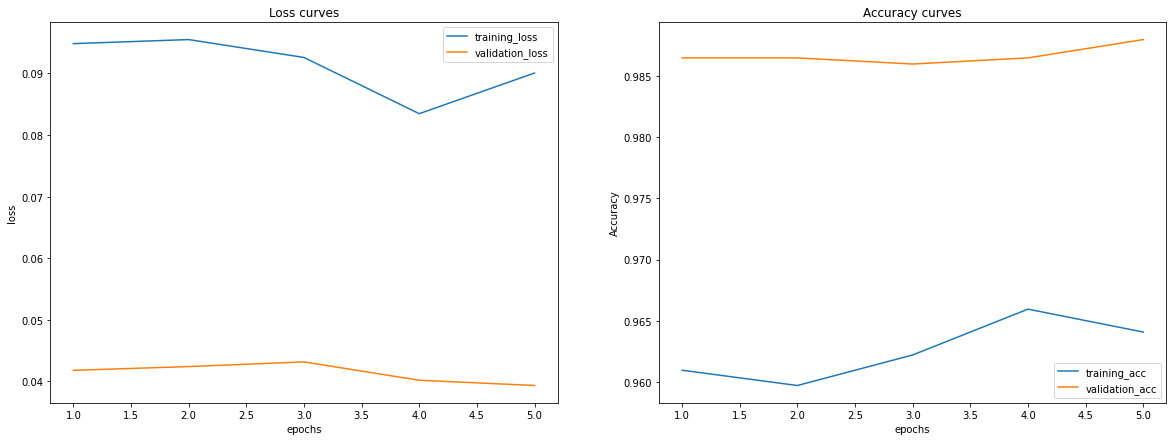

In [31]:
plot_loss_curves(history_of_model)

In [32]:
model.save('models/catsVSdogs.h5')